<a href="https://colab.research.google.com/github/FVRDaniel/Dimensionality-Reduction-in-Images-for-Neural-Networks/blob/main/Dimensionality_Reduction_in_Images_for_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

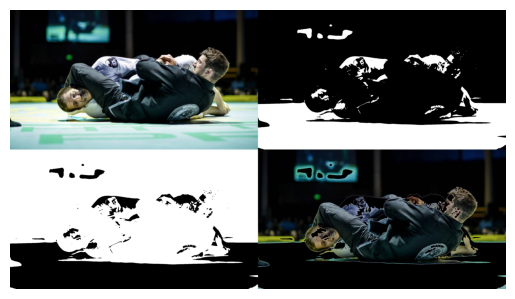

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Caminho para a imagem
image_path = r"/content/BJJ.jpg"

# Carregar a imagem
image = cv2.imread(image_path)
if image is None:
    print(f"Erro: Imagem não encontrada no caminho {image_path}")
    exit()

# Converter para RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Aplicar suavização
suave = cv2.GaussianBlur(image, (7, 7), 0)


(T, bin) = cv2.threshold(cv2.cvtColor(suave, cv2.COLOR_RGB2GRAY), 160, 255, cv2.THRESH_BINARY)
(T, binInv) = cv2.threshold(cv2.cvtColor(suave, cv2.COLOR_RGB2GRAY), 160, 255, cv2.THRESH_BINARY_INV)

bin_rgb = cv2.cvtColor(bin, cv2.COLOR_GRAY2RGB)
binInv_rgb = cv2.cvtColor(binInv, cv2.COLOR_GRAY2RGB)


try:
    resultado = np.vstack([
        np.hstack([suave, bin_rgb]),
        np.hstack([binInv_rgb, cv2.bitwise_and(image, image, mask=binInv)])
    ])

    # Exibir no Google Colab usando matplotlib
    plt.imshow(resultado)
    plt.axis("off")
    plt.show()

except Exception as e:
    print(f"Ocorreu um erro: {e}")